In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install torchvision==0.13.0 torch==1.12.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.0+cu116
    Uninstalling torch-1.13.0+cu116:
      Successfully uninstalled torch-1.13.0+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.0+cu116
    Uninstalling torchvision-0.14.0+cu116:
      Successfully uninstalled torchvision-0.14.0+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.0 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.
torchaudio 0.13.0+cu116 requires torch==1.13.0, but you have torch 1.12.0 which is incompatible.


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 28.1 MB/s eta 0:00:00


In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 34.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchmetrics import AUROC
import io
import matplotlib.pyplot as plt
import time
import os
import copy
from glob import glob
from tqdm import tqdm

import warnings
import pandas as pd
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,roc_curve
warnings.simplefilter('ignore')


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name())

cuda:0
Tesla T4


In [ ]:
!pip install split-folders

import splitfolders as sf

sf.ratio('gdrive/MyDrive/Marwan/Alzheimer_s Dataset/train','output',ratio=(0.8,0.2,0),seed=42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 5121 files [02:34, 33.07 files/s] 


# learn

In [ ]:
count_mildDem = 0
count_moderateDem = 0
count_nonDem = 0
count_veryMildeDem = 0
count_mildDem2 = 0
count_moderateDem2 = 0
count_nonDem2 = 0
count_veryMildeDem2 = 0
count_mildDem3 = 0
count_moderateDem3 = 0
count_nonDem3 = 0
count_veryMildeDem3 = 0

In [ ]:
from torch.utils.data import WeightedRandomSampler

In [ ]:
BATCH_SIZE=24
EPOCH=60
LEARNING_RATE=0.0001

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.25),
        transforms.RandomVerticalFlip(p=0.25),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(0.1,0.1,0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    "test" :
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './output'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                        data_transforms[x])
                    for x in ['train', 'val']}
data_dir2 = 'gdrive/MyDrive/Marwan/Alzheimer_s Dataset'
image_datasets["test"] = datasets.ImageFolder(os.path.join(data_dir2, "test"),
                                        data_transforms["test"])


for i in image_datasets["train"].imgs:
  if i[1] == 0:
    count_mildDem += 1
  elif i[1] == 1:
    count_moderateDem += 1
  elif i[1] == 2:
    count_nonDem += 1
  else:
    count_veryMildeDem += 1

for i in image_datasets["val"].imgs:
  if i[1] == 0:
    count_mildDem2 += 1
  elif i[1] == 1:
    count_moderateDem2 += 1
  elif i[1] == 2:
    count_nonDem2 += 1
  else:
    count_veryMildeDem2 += 1

for i in image_datasets["test"].imgs:
  if i[1] == 0:
    count_mildDem3 += 1
  elif i[1] == 1:
    count_moderateDem3 += 1
  elif i[1] == 2:
    count_nonDem3 += 1
  else:
    count_veryMildeDem3 += 1

lis = [count_mildDem,count_moderateDem,count_nonDem,count_veryMildeDem]
lis2 = [count_mildDem2,count_moderateDem2,count_nonDem2,count_veryMildeDem2]
lis3 = [count_mildDem3,count_moderateDem3,count_nonDem3,count_veryMildeDem3]
class_weights = [sum(lis)/ c for c in lis]
class_weights2 = [sum(lis2)/ c for c in lis2]
class_weights3 = [sum(lis3)/ c for c in lis3]

example_weights = [class_weights[i[1]] for i in image_datasets["train"].imgs]
example_weights2 = [class_weights2[i[1]] for i in image_datasets["val"].imgs]
example_weights3 = [class_weights3[i[1]] for i in image_datasets["test"].imgs]

sampler = WeightedRandomSampler(example_weights, len(image_datasets["train"].imgs))
sampler2 = WeightedRandomSampler(example_weights2, len(image_datasets["val"].imgs))
sampler3 = WeightedRandomSampler(example_weights3, len(image_datasets["test"].imgs))

dataloaders = {
    'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=BATCH_SIZE, sampler = sampler,
                                            shuffle=False, num_workers=4),
    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=BATCH_SIZE, #sampler = sampler2,
                                            shuffle=True, num_workers=4),
    'test': torch.utils.data.DataLoader(image_datasets['test'], batch_size=BATCH_SIZE, #sampler = sampler3,
                                            shuffle=False, num_workers=4)
                                            }

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val',"test"]}
class_names = image_datasets['train'].classes

In [ ]:
!pip install vit_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.9 MB/s eta 0:00:00


In [ ]:
import torch
from vit_pytorch.crossformer import CrossFormer

torch.Size([3, 680, 1810])


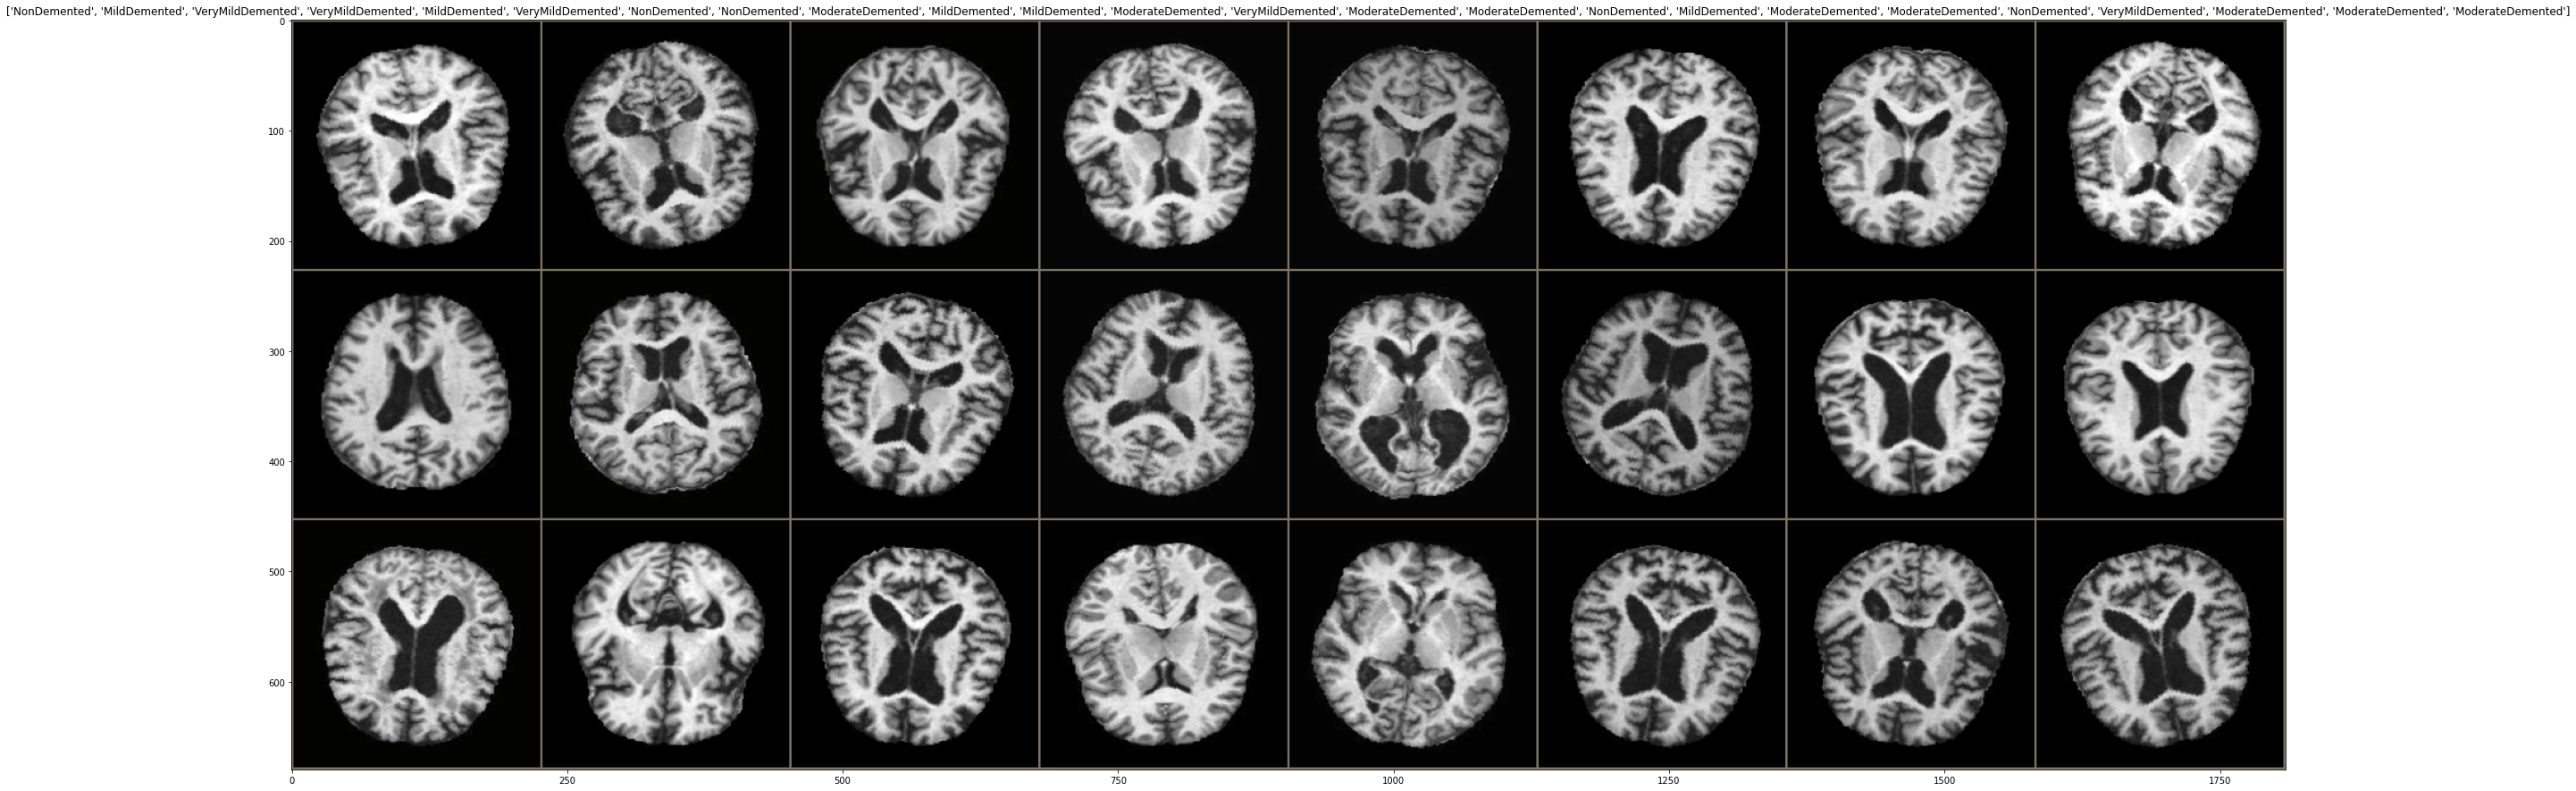

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    print(inp.shape)
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(40,40))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, name, num_epochs=25, feature_extractor = None):

    #Creating a folder to save the model performance.
    try:

        os.mkdir('modelPerformance')
        os.mkdir(f'modelPerformance/{name}')
    except:
        print('directory exists')

    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    

    for epoch in range(num_epochs):

        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            #epochs
            
            epoch=int(len(image_datasets[phase])/BATCH_SIZE)
            
            for _ in tqdm(range(epoch)):
                #Loading Data
                inputs, labels = next(iter(dataloaders[phase]))
                #inputs = feature_extractor(images=inputs, return_tensors="pt")
                inputs = inputs.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)

                    outputs = outputs.logits

                    _, preds = torch.max(outputs, 1)

                    labels = labels.to(device)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #AUC: {:.4f} , epoch_auc
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(        
                phase, epoch_loss, epoch_acc))
    
            
            # deep copy the model
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model,'/content/modelPerformance/{}/best_model_{:.4f}acc_{}epochs.h5'.format(name,epoch_acc,num_epochs))

                train_losses = []
                valid_losses = []

        print()


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    
    with open(f'/content/modelPerformance/{name}/'+sorted(os.listdir(f'/content/modelPerformance/{name}/'))[-1], 'rb') as f:
        buffer = io.BytesIO(f.read())
    model=torch.load(buffer)
    # load best model weights
    model.load_state_dict(best_model_wts)

    return model

In [ ]:
import torch
torch.cuda.empty_cache()


In [ ]:
import gc
gc.collect()


0

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 25.2 MB/s eta 0:00:00


In [ ]:
# from vit_pytorch import SimpleViT
from transformers import ViTForImageClassification
from PIL import Image
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224', ignore_mismatched_sizes=True, num_labels=4 , attention_probs_dropout_prob=0.2, hidden_dropout_prob=0.25)


Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# model = CrossViT(
#     image_size = 224,
#     num_classes = 4,
#     depth = 4,               # number of multi-scale encoding blocks
#     sm_dim = 192,            # high res dimension
#     sm_patch_size = 16,      # high res patch size (should be smaller than lg_patch_size)
#     sm_enc_depth = 2,        # high res depth
#     sm_enc_heads = 8,        # high res heads
#     sm_enc_mlp_dim = 2048,   # high res feedforward dimension
#     lg_dim = 384,            # low res dimension
#     lg_patch_size = 32,      # low res patch size
#     lg_enc_depth = 3,        # low res depth
#     lg_enc_heads = 8,        # low res heads
#     lg_enc_mlp_dim = 2048,   # low res feedforward dimensions
#     cross_attn_depth = 2,    # cross attention rounds
#     cross_attn_heads = 8,    # cross attention heads
#     dropout = 0.1,
#     emb_dropout = 0.1
# )
# model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/CrossVITModel.pth"))
# model = SimpleViT(
#     image_size = 224,
#     patch_size = 32,
#     num_classes = 4,
#     dim = 1024,
#     depth = 6,
#     heads = 16,
#     mlp_dim = 2048
# )

model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/google_vit2.pth"))

model_ft = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.AdamW(model_ft.parameters(), lr=0.0001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01)
#optimizer_ft = optim.AdamW(model_ft.parameters(), lr=LEARNING_RATE, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, name="CrossFormer", num_epochs=10)


Epoch 1/10
----------


100%|██████████| 170/170 [05:35<00:00,  1.98s/it]


train Loss: 0.1218 Acc: 0.9514


100%|██████████| 53/53 [01:17<00:00,  1.46s/it]


test Loss: 0.0037 Acc: 0.9945

Epoch 2/10
----------


100%|██████████| 170/170 [05:40<00:00,  2.00s/it]


train Loss: 0.0711 Acc: 0.9726


100%|██████████| 53/53 [01:07<00:00,  1.27s/it]


test Loss: 1.1857 Acc: 0.7045

Epoch 3/10
----------


100%|██████████| 170/170 [05:41<00:00,  2.01s/it]


train Loss: 0.0748 Acc: 0.9673


100%|██████████| 53/53 [01:09<00:00,  1.32s/it]


test Loss: 0.1151 Acc: 0.9531

Epoch 4/10
----------


100%|██████████| 170/170 [05:44<00:00,  2.03s/it]


train Loss: 0.0840 Acc: 0.9648


100%|██████████| 53/53 [01:04<00:00,  1.22s/it]


test Loss: 0.5319 Acc: 0.8288

Epoch 5/10
----------


100%|██████████| 170/170 [05:49<00:00,  2.05s/it]


train Loss: 0.0749 Acc: 0.9683


100%|██████████| 53/53 [01:10<00:00,  1.33s/it]


test Loss: 1.0829 Acc: 0.6216

Epoch 6/10
----------


100%|██████████| 170/170 [05:57<00:00,  2.10s/it]


train Loss: 0.0659 Acc: 0.9722


100%|██████████| 53/53 [01:18<00:00,  1.49s/it]


test Loss: 0.0005 Acc: 0.9945

Epoch 7/10
----------


100%|██████████| 170/170 [06:00<00:00,  2.12s/it]


train Loss: 0.0686 Acc: 0.9729


100%|██████████| 53/53 [01:11<00:00,  1.34s/it]


test Loss: 0.1746 Acc: 0.9531

Epoch 8/10
----------


 95%|█████████▌| 162/170 [05:52<00:16,  2.10s/it]Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/usr/lib/python3.8/shutil.py", line 722, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/usr/lib/python3.8/shutil.py", line 720, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-85mf98t2'
100%|██████████| 170/170 [06:08<00:00,  2.17s/it]


train Loss: 0.0426 Acc: 0.9819


100%|██████████| 53/53 [01:15<00:00,  1.42s/it]


test Loss: 0.0796 Acc: 0.9531

Epoch 9/10
----------


100%|██████████| 170/170 [05:49<00:00,  2.06s/it]


train Loss: 0.0271 Acc: 0.9873


100%|██████████| 53/53 [01:16<00:00,  1.45s/it]


test Loss: 0.0711 Acc: 0.9531

Epoch 10/10
----------


100%|██████████| 170/170 [05:56<00:00,  2.09s/it]


train Loss: 0.0248 Acc: 0.9880


100%|██████████| 53/53 [01:12<00:00,  1.36s/it]


test Loss: 0.0120 Acc: 0.9945

Training complete in 70m 28s
Best val Acc: 0.994527


In [ ]:
'/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1]

'/content/modelPerformance/CrossFormer/best_model_0.9945acc_10epochs.h5'

In [ ]:
best_model=torch.load('/content/modelPerformance/CrossFormer/'+sorted(os.listdir('/content/modelPerformance/CrossFormer'))[-1])

In [ ]:
type(best_model)

transformers.models.vit.modeling_vit.ViTForImageClassification

In [ ]:
torch.save(best_model.state_dict(), "gdrive/MyDrive/Marwan/google_vit3.pth")

In [ ]:
model2 = model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/google_vit2.pth"))

In [ ]:
print (model2)

<All keys matched successfully>


In [ ]:
from torchmetrics.classification import MulticlassF1Score

In [ ]:
accuracies = []
scores = []
def test_model(model ,device, test_loader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data[0].to(device), data[1].to(device)
                #metric = MulticlassF1Score(num_classes=4).to(device)
                outputs = best_model(images)
                _, predicted = torch.max(outputs.logits, 1)
                fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
                # acc = metric(outputs.logits,labels)
                # accuracies.append(acc)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Correct Prediction: {:d}  Total Images: {:d}'.format(correct, total))
        print('Test Accuracy = {:f}'.format(correct / total))

test_model(best_model,'cuda',dataloaders['test'])
#print(f"f1 score = {sum(accuracies)/ len(accuracies)}")

Correct Prediction: 1052  Total Images: 1279
Test Accuracy = 0.822518


In [ ]:
model.load_state_dict(torch.load("gdrive/MyDrive/Marwan/google_vit2.pth"))
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.25, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.2, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.25, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, ou

In [ ]:
model_ft = model.to(device)

In [ ]:
import numpy

accuracies = []
y_pred = []
y_true = []
scores = []

def test_model(model ,device, test_loader):
        correct = 0
        total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data[0].to(device), data[1].to(device)
                y_true.extend(labels.cpu().numpy())
                #metric = MulticlassF1Score(num_classes=4).to(device)
                outputs = model_ft(images)
                scores.extend(outputs.logits.cpu())
                _, predicted = torch.max(outputs.logits, 1)
                y_pred.extend(predicted.cpu().numpy())
                # acc = metric(outputs.logits,labels)
                # accuracies.append(acc)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Correct Prediction: {:d}  Total Images: {:d}'.format(correct, total))
        print('Test Accuracy = {:f}'.format(correct / total))

test_model(model_ft,'cuda',dataloaders['test'])
#print(f"f1 score = {sum(accuracies)/ len(accuracies)}")

Correct Prediction: 1061  Total Images: 1279
Test Accuracy = 0.829554


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)


In [ ]:
class_names = ('mildDemented', 'moderateDemented', 'nonDemented', 'veryMildDemented')
# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

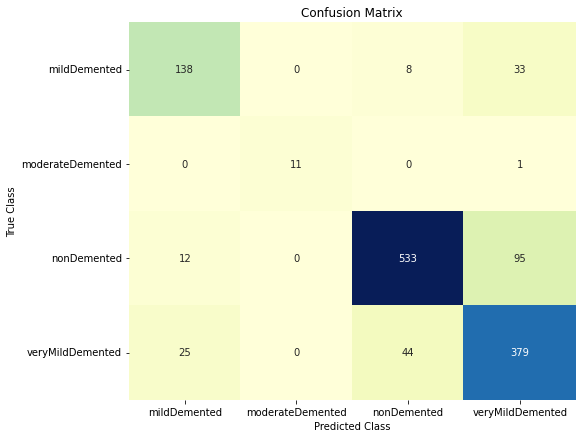

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
 
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")
 
plt.title("Confusion Matrix"), plt.tight_layout()

plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()

In [ ]:
precision midldDemented Model2 Validation: 0.7709
precision moderateDemented Model2 Validation: 0.9167
precision nonDemented Model2 Validation: 0.8328
precision veryMildDemented Model2 Validation: 0.8460
Recall midldDemented Model2 Validation: 0.7886
Recall moderateDemented Model2 Validation: 1.0
Recall nonDemented Model2 Validation: 0.9111
Recall veryMildDemented Model2 Validation: 0.7461